Make sure that libraries are already installed.

In [1]:
import platform
import os, sys
import numpy as np
from osgeo import gdal, ogr
gdal.UseExceptions()     

print("Python Version",platform.python_version())
print("GDAL Version", gdal.__version__)

Python Version 3.7.3
GDAL Version 2.4.1


As long as Sentinel-2 data is stored in [JPEG2000 format](https://github.com/uclouvain/openjpeg), we need the "driver" that understands this image compression format which is known as a .jp2 file. So, we have to check it's installation as well.

In [2]:
!gdalinfo --formats | grep JPEG2000

Get testing data

Download from copernicus the following files:

T18NZN_20181217T151659_TCI_10m.jp2

T18NZN_20190126T151709_TCI_10m.jp2

In particular, I choose "T18NZN" tile as example because this area is interesting for my research.

In order to get data we use the sentinel hub API

In [3]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
from collections import OrderedDict
import kml2geojson
import re
#import wget, urllib
#from urllib.request import urlopen

Create an instance from sentinelhub by using credentials from your account

In [4]:
api = SentinelAPI('dacostaortiz', 'pokemonuis', 'https://scihub.copernicus.eu/dhus')

Data retrived can be referenced from a previous created shapefile.

In [5]:
kml2geojson.main.convert('santander.kml', './') #this will converte the kml to a geojson file

footprint = geojson_to_wkt(read_geojson('santander.geojson'))

By using the created file, data can be query from copernicus servers by the Sentinel Hub API.

In [6]:
products = api.query(footprint,
                   date = ('20181201', date(2019, 1, 31)),
                   platformname = 'Sentinel-2',
                   cloudcoverpercentage = (0, 100))

Querying products: 100%|██████████| 271/271 [00:04<00:00, 42.61 products/s]


In [15]:
#products

In [17]:
products_df = api.to_geodataframe(products)
products_df.head()

,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,relativeorbitnumber,...,processinglevel,producttype,platformname,size,uuid,datatakesensingstart,sensoroperationalmode,tileid,hv_order_tileid,geometry
00723880-6f14-4b98-9232-bf0aa68e4cb7,S2B_MSIL2A_20190116T151709_N0211_R125_T18PZQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-16T15:17:09.024Z, Instrument: MS...",2019-01-17 04:39:58.712,2019-01-16 15:17:09.024,2019-01-16 15:17:09.024,9732,125,...,Level-2A,S2MSI2A,Sentinel-2,1.11 GB,00723880-6f14-4b98-9232-bf0aa68e4cb7,NaT,NaN,NaN,NaN,POLYGON ((-71.57989499999999 9.030504166854142...
013b614a-f8b8-4974-9343-3b3f657b81c2,S2B_MSIL2A_20190116T151709_N0211_R125_T18NYN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-16T15:17:09.024Z, Instrument: MS...",2019-01-17 04:48:33.229,2019-01-16 15:17:09.024,2019-01-16 15:17:09.024,9732,125,...,Level-2A,S2MSI2A,Sentinel-2,940.66 MB,013b614a-f8b8-4974-9343-3b3f657b81c2,NaT,NaN,NaN,NaN,"POLYGON ((-73.19208 6.395960868853862, -73.161..."
025b115a-645f-43b1-b50b-191d795e925f,S2A_MSIL2A_20190114T152641_N0211_R025_T18PXR_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-14T15:26:41.024Z, Instrument: MS...",2019-01-14 22:46:15.495,2019-01-14 15:26:41.024,2019-01-14 15:26:41.024,18612,25,...,Level-2A,S2MSI2A,Sentinel-2,1.10 GB,025b115a-645f-43b1-b50b-191d795e925f,NaT,NaN,NaN,NaN,"POLYGON ((-74.08774 9.950163774144059, -73.086..."
02a57ae7-a504-4b97-a63b-f2f6098d33db,S2A_MSIL1C_20190101T151701_N0207_R125_T18NYN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-01T15:17:01.024Z, Instrument: MS...",2019-01-01 18:16:29.436,2019-01-01 15:17:01.024,2019-01-01 15:17:01.024,18426,125,...,Level-1C,S2MSI1C,Sentinel-2,771.88 MB,02a57ae7-a504-4b97-a63b-f2f6098d33db,2019-01-01 15:17:01.024,INS-NOBS,18NYN,NN18Y,(POLYGON ((-73.19213999999999 6.37884189619031...
02ac22aa-f915-4cd5-b662-0d9c2f939a40,S2B_MSIL2A_20190106T151659_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-06T15:16:59.024Z, Instrument: MS...",2019-01-07 04:23:33.740,2019-01-06 15:16:59.024,2019-01-06 15:16:59.024,9589,125,...,Level-2A,S2MSI2A,Sentinel-2,979.78 MB,02ac22aa-f915-4cd5-b662-0d9c2f939a40,NaT,NaN,NaN,NaN,POLYGON ((-72.28369000000001 7.229727890841263...


I've defined two functions over the generated metadata dataframe in order to get some insigths from data that we could potentially download.

In [9]:
def query_size(df):
    c = 0
    for f in df['size']:
        d = f.split(' ')
        if d[1] == 'MB':
            c+=float(d[0])/1000
        else:
            c+=float(d[0])
    print("size in GB: "+str(c))
def query_clouds(df):
    print("media: ",df['cloudcoverpercentage'].mean())
    print("mediana",df['cloudcoverpercentage'].median())
    print("max",df['cloudcoverpercentage'].max())
    print("min",df['cloudcoverpercentage'].min())

In [10]:
query_size(products_df)

size in GB: 191.01443000000003


media:  31.268805774907747
mediana 22.3315
max 99.88149700000001
min 0.0404


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c8f2a16d8>]],
      dtype=object)

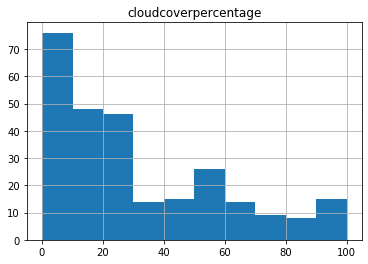

In [18]:
query_clouds(products_df)
products_df.hist(column='cloudcoverpercentage',bins=10)

From previous histofram we can notice that most of images were taken with low cloud coverage.

Now let's choose a single tile.

In [12]:
tile = 'T18NZN'

Also, let's filter by product. Images at Level-2A have a higher processing level because these are orto images at UTM/WGS84 projection. [ref](https://sentinel.esa.int/web/sentinel/missions/sentinel-2/data-products)

In [13]:
fk = [] #filtered keys
for k, v in products.items(): 
    if all(e in v['title'].split('_') for e in ['MSIL2A',tile]): # MSIL2A it's product type
        #print(k, v['title']) 
        fk.append(k)
filtered = { k: products[k] for k in fk }
api.to_geodataframe(filtered)

,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,relativeorbitnumber,...,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,uuid,geometry
02ac22aa-f915-4cd5-b662-0d9c2f939a40,S2B_MSIL2A_20190106T151659_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-06T15:16:59.024Z, Instrument: MS...",2019-01-07 04:23:33.740,2019-01-06 15:16:59.024,2019-01-06 15:16:59.024,9589,125,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,979.78 MB,02ac22aa-f915-4cd5-b662-0d9c2f939a40,POLYGON ((-72.28369000000001 7.229727890841263...
0392ea21-83ca-4630-9d49-d15a038f121c,S2A_MSIL2A_20190121T151701_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-21T15:17:01.024Z, Instrument: MS...",2019-01-21 21:44:49.803,2019-01-21 15:17:01.024,2019-01-21 15:17:01.024,18712,125,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.01 GB,0392ea21-83ca-4630-9d49-d15a038f121c,POLYGON ((-72.28369000000001 7.229727890841263...
0ac0603d-e102-46eb-b7e9-5a10776de7cc,S2A_MSIL2A_20181222T151701_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-22T15:17:01.024Z, Instrument: MS...",2018-12-22 22:08:18.779,2018-12-22 15:17:01.024,2018-12-22 15:17:01.024,18283,125,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.05 GB,0ac0603d-e102-46eb-b7e9-5a10776de7cc,POLYGON ((-72.28369000000001 7.229727890841263...
257b29b0-5c13-475b-b7b6-8b486abfecc8,S2B_MSIL2A_20181227T151659_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-27T15:16:59.024Z, Instrument: MS...",2018-12-27 23:59:44.906,2018-12-27 15:16:59.024,2018-12-27 15:16:59.024,9446,125,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.08 GB,257b29b0-5c13-475b-b7b6-8b486abfecc8,POLYGON ((-72.28369000000001 7.229727890841263...
30138845-dbb4-420a-bc7d-3e91d08a0083,S2B_MSIL2A_20190126T151709_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-26T15:17:09.024Z, Instrument: MS...",2019-01-26 23:16:10.047,2019-01-26 15:17:09.024,2019-01-26 15:17:09.024,9875,125,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,946.70 MB,30138845-dbb4-420a-bc7d-3e91d08a0083,POLYGON ((-72.28369000000001 7.229727890841263...
6a5b4db6-08e3-4a92-b789-e4dd3d786965,S2A_MSIL2A_20190111T151701_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-11T15:17:01.024Z, Instrument: MS...",2019-01-11 23:07:49.021,2019-01-11 15:17:01.024,2019-01-11 15:17:01.024,18569,125,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,953.43 MB,6a5b4db6-08e3-4a92-b789-e4dd3d786965,POLYGON ((-72.28369000000001 7.229727890841263...
9787b2ba-4052-442d-bff9-dfe510d02b5c,S2A_MSIL2A_20190101T151701_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-01T15:17:01.024Z, Instrument: MS...",2019-01-01 22:08:37.169,2019-01-01 15:17:01.024,2019-01-01 15:17:01.024,18426,125,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.01 GB,9787b2ba-4052-442d-bff9-dfe510d02b5c,POLYGON ((-72.2836900000000

Then, let's use the filtered dataframe to download the files.

In [14]:
api.download_all(filtered)

Downloading: 100%|██████████| 993M/993M [59:49<00:00, 115kB/s]   
MD5 checksumming: 100%|██████████| 993M/993M [00:02<00:00, 412MB/s]  
Downloading: 100%|██████████| 1.09G/1.09G [58:14<00:00, 311kB/s]  
MD5 checksumming: 100%|██████████| 1.09G/1.09G [00:02<00:00, 466MB/s]
Downloading: 100%|██████████| 1.08G/1.08G [1:07:44<00:00, 1.04MB/s]
MD5 checksumming: 100%|██████████| 1.08G/1.08G [00:02<00:00, 408MB/s] 
Downloading: 100%|██████████| 1.00G/1.00G [53:04<00:00, 535kB/s]  
MD5 checksumming: 100%|██████████| 1.00G/1.00G [00:02<00:00, 466MB/s]
Downloading: 100%|██████████| 1.03G/1.03G [1:08:48<00:00, 249kB/s]
MD5 checksumming: 100%|██████████| 1.03G/1.03G [00:02<00:00, 384MB/s] 
Downloading: 100%|██████████| 1.09G/1.09G [1:26:31<00:00, 281kB/s]
MD5 checksumming: 100%|██████████| 1.09G/1.09G [00:02<00:00, 396MB/s] 
Downloading: 100%|██████████| 1.16G/1.16G [1:14:56<00:00, 539kB/s] 
MD5 checksumming: 100%|██████████| 1.16G/1.16G [00:02<00:00, 462MB/s]
Downloading: 100%|██████████| 1.13G/1

(OrderedDict([('30138845-dbb4-420a-bc7d-3e91d08a0083',
               {'id': '30138845-dbb4-420a-bc7d-3e91d08a0083',
                'title': 'S2B_MSIL2A_20190126T151709_N0211_R125_T18NZN_20190126T191831',
                'size': 992749695,
                'md5': '4C8562B5845B744961EEBEA2F292AD76',
                'date': datetime.datetime(2019, 1, 26, 15, 17, 9, 24000),
                'footprint': 'POLYGON((-72.28369 7.229727890841263,-71.29068 7.222725668752657,-71.29819 6.231557817285321,-72.289215 6.23759121662033,-72.28369 7.229727890841263))',
                'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('30138845-dbb4-420a-bc7d-3e91d08a0083')/$value",
                'path': './S2B_MSIL2A_20190126T151709_N0211_R125_T18NZN_20190126T191831.zip',
                'downloaded_bytes': 992749695}),
              ('0392ea21-83ca-4630-9d49-d15a038f121c',
               {'id': '0392ea21-83ca-4630-9d49-d15a038f121c',
                'title': 'S2A_MSIL2A_20190121T151701_N0211

Unzip file S2B_MSIL2A_20190126T151709_N0211_R125_T18NZN... as we mentioned before.

In [4]:
imagePath = "./S2B_MSIL2A_20190126T151709_N0211_R125_T18NZN_20190126T191831.SAFE/GRANULE/L2A_T18NZN_A009875_20190126T151946/IMG_DATA/"

Inside of this directory are 3 folders.

In [5]:
os.listdir(imagePath)

['R60m', 'R10m', 'R20m']

Inside of these folders are rasters at 10, 20 and 60 meters of resolution. Let's check TCI image which is a 3 banded raster.

In [6]:
!gdalinfo ./S2B_MSIL2A_20190126T151709_N0211_R125_T18NZN_20190126T191831.SAFE/GRANULE/L2A_T18NZN_A009875_20190126T151946/IMG_DATA/R10m/T18NZN_20190126T151709_TCI_10m.jp2

Driver: JP2OpenJPEG/JPEG-2000 driver based on OpenJPEG library
Files: ./S2B_MSIL2A_20190126T151709_N0211_R125_T18NZN_20190126T191831.SAFE/GRANULE/L2A_T18NZN_A009875_20190126T151946/IMG_DATA/R10m/T18NZN_20190126T151709_TCI_10m.jp2
Size is 10980, 10980
Coordinate System is:
PROJCS["WGS 84 / UTM zone 18N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AXIS["Latitude",NORTH],
        AXIS["Longitude",EAST],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-75],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORI

In [7]:
print(imagePath)

./S2B_MSIL2A_20190126T151709_N0211_R125_T18NZN_20190126T191831.SAFE/GRANULE/L2A_T18NZN_A009875_20190126T151946/IMG_DATA/


In order to visualize on the notebook the images, I've built a function to load pixels.

In [8]:
import glob
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline
#imagePath = '../data/2019-01/S2B_MSIL1C_20190129T152639_N0207_R025_T18PYQ_20190129T201832.SAFE/GRANULE/L1C_T18PYQ_A009918_20190129T152639/IMG_DATA/'

In [9]:
# def load_data_bands(path,bands='bgrn'):
#     bmd = {'bgrn':['02','03','04','08'],
#            'rgb':['04','03','02'],
#            'all':['01','02','03','04','05','06','07','08','09','10','11','12']} #dictionary bands map
#     arrs = []
#     meta = None
#     try:
#         jp2s=bmd[bands]
#         for jp2 in jp2s:
#             with rasterio.open(glob.glob(path+'*B'+jp2+'.jp2')[0]) as f:
#                 print(f)
#                 arrs.append(f.read(1))
#             if jp2 == '02':
#                 meta = f.meta
#         if bands in {'bgrn','rgb'}: 
#             data = np.array(arrs,dtype=arrs[0].dtype)
#         else: 
#             data = arrs
#         return data, meta
#     except:
#         print('bands map not defined')
#         return None, None

In [9]:
img_tci = rasterio.open(imagePath+"R10m/T18NZN_20190126T151709_TCI_10m.jp2",driver='JP2OpenJPEG')

In [10]:
img_tci.meta #raster metadata

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 3,
 'crs': CRS({'init': 'epsg:32618'}),
 'transform': Affine(10.0, 0.0, 799980.0,
        0.0, -10.0, 800040.0)}

In [12]:
#number of raster column
img_tci.width

10980

In [13]:
#number of raster rows
img_tci.height

10980

In [14]:
#plot.show_hist(img_tci) #image histogram stucks on my laptop

In [11]:
#visualization
# Read the grid values into numpy arrays
r = img_tci.read(3)
g = img_tci.read(2)
b = img_tci.read(1)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
r = normalize(r)
g = normalize(g)
b = normalize(b)

print("Normalized bands")
print(r.min(), '-', r.max(), 'mean:', r.mean())
print(g.min(), '-', g.max(), 'mean:', g.mean())
print(b.min(), '-', b.max(), 'mean:', b.mean())

Normalized bands
0.0 - 1.0 mean: 0.8569608798804994
0.0 - 1.0 mean: 0.8694172453205642
0.0 - 1.0 mean: 0.8638265995513397


In [12]:
# Create RGB natural color composite
rgb = np.dstack((r, g, b))

# Let's see how our color composite looks like
#plt.imshow(rgb)

In [14]:
rgb.shape

(10980, 10980, 3)

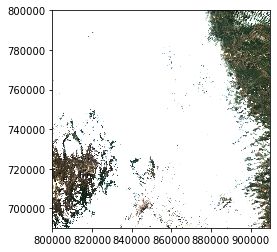

In [15]:
rasterio.plot.show(img_tci.read(), transform=img_tci.transform)